In [166]:
import sys
import numpy as np
import networkx as nx
from scipy.stats import bernoulli

from matplotlib import pyplot as plt

from tag2hierarchy.hierarchy import HTMLPLOT
from tag2hierarchy.hierarchy import tree2Dict
from tag2hierarchy.hierarchy import treeHandlers

%matplotlib notebook

# Prepare Tree

In [15]:
dictTree = {"name":"A","children":[{"name":"B","children":None},
                                   {"name":"C","children":[{"name":"D","children":None},{"name":"E","children":None},{"name":"F","children":None}]}]}
objectTree = tree2Dict.fromDictTreeToObjectTree([dictTree])
HTMLPLOT.vizualizeObjectTree("./", objectTree, plotName='graphSkeleton', dynamic=False)
treeHandlers.setBranch(objectTree)
nodesPerLevel = treeHandlers.obtainNodesPerLevel(objectTree)

In [23]:
proportionOfParent = {objectTree[0].name:1.}
probabilityIncrease = {objectTree[0].name:1.,"p":0.85}

for node in treeHandlers.transverseTree(objectTree):
    try:
        numberOfChildren = len(node.children)
        proportionOfChildrenCommunities = np.random.dirichlet(alpha=np.repeat(0.7,numberOfChildren))
        for j,n in enumerate(node.children):
            proportionOfParent[n.name] = proportionOfChildrenCommunities[j]
            probabilityIncrease[n.name] = np.random.uniform()
    except:
        pass 

In [160]:
numberOfNodes = 1000
P = np.ones((numberOfNodes,numberOfNodes))*0.99
objectTree[0].cargo = {"NodesInCommunity":range(numberOfNodes),"SizeOfCommunity":numberOfNodes}

for node in treeHandlers.transverseTree(objectTree):    
    print "Obtaining communities for: ",node.name
    try:
        numberOfChildren = len(node.children)
    except:
        continue
    
    #obtaining list of nodes in parent
    numberOfNodes = node.cargo["SizeOfCommunity"]
    NodesInCommunity = node.cargo["NodesInCommunity"]
    #define how many nodes per children
    proportionOfChildrenCommunities = np.random.dirichlet(alpha=np.repeat(0.6,numberOfChildren))
    indexStart = map(int,np.random.dirichlet(alpha=np.repeat(0.7,numberOfChildren))*numberOfNodes)
    #now we devide the nodes
    indexSum = 0
    for j, indexS in enumerate(indexStart[:-1]):
        NodesInChildren = NodesInCommunity[indexSum:indexSum+indexS]
        node.children[j].cargo = {"NodesInCommunity":NodesInChildren,
                                  "SizeOfCommunity":len(NodesInChildren)}
        #
        P[np.array(NodesInChildren)[:,np.newaxis],np.array(NodesInChildren)] = \
        P[np.array(NodesInChildren)[:,np.newaxis],np.array(NodesInChildren)]*0.8
        
        indexSum += indexS
    j = len(indexStart)-1
    NodesInChildren = NodesInCommunity[indexSum:]
    node.children[j].cargo = {"NodesInCommunity":NodesInChildren,
                          "SizeOfCommunity":len(NodesInChildren)}
    P[np.array(NodesInChildren)[:,np.newaxis],np.array(NodesInChildren)] = \
    P[np.array(NodesInChildren)[:,np.newaxis],np.array(NodesInChildren)]*0.8
        


Obtaining communities for:  A
Obtaining communities for:  B
Obtaining communities for:  C
Obtaining communities for:  D
Obtaining communities for:  E
Obtaining communities for:  F


In [161]:
P = 1. - P

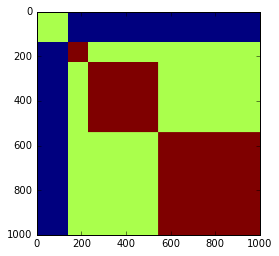

In [162]:
plt.imshow(P)

In [164]:
hierarchicalGraph = nx.from_numpy_matrix(bernoulli.rvs(P))
print hierarchicalGraph.number_of_edges()

180484


<IPython.core.display.Javascript object>


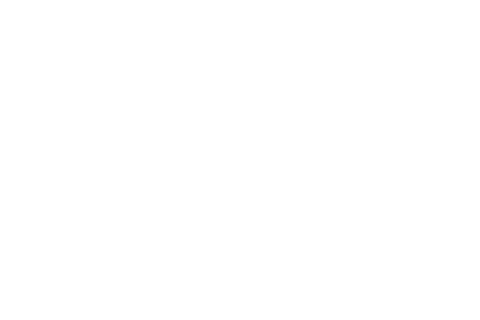

<IPython.core.display.Javascript object>


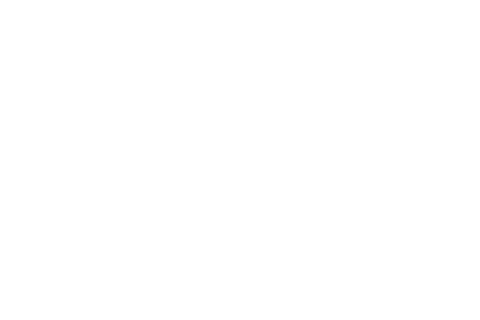

In [167]:
nx.draw(hierarchicalGraph)

In [108]:
numberOfNodes = 1000
objectTree[0].cargo = {"NodesInCommunity":range(numberOfNodes),"SizeOfCommunity":numberOfNodes}
P = np.ones((numberOfNodes,numberOfNodes))*probabilityIncrease[objectTree[0].name]

#for level in range(len(nodesPerLevel)):
    

In [84]:
numberOfChildren = 4
numberOfNodes = 100
P = np.ones((numberOfNodes,numberOfNodes))*0.9
proportionOfChildrenCommunities = np.random.dirichlet(alpha=np.repeat(0.6,numberOfChildren))
#==================================
#
#==================================
indexStart = map(int,np.random.dirichlet(alpha=np.repeat(0.7,numberOfChildren))*numberOfNodes)
print indexStart
print sum(indexStart)
NodesInCommunity = range(numberOfNodes)
indexSum = 0
for j, indexS in enumerate(indexStart[:-1]):
    NodesInChildred = NodesInCommunity[indexSum:indexSum+indexS]
    print NodesInChildred
    #P[np.array(NodesInChildred)[:,np.newaxis],np.array(NodesInChildred)] = P[np.array(NodesInChildred)[:,np.newaxis],np.array(NodesInChildred)]*np.random.uniform()
    indexSum += indexS
P[np.array(NodesInCommunity[indexSum:])[:,np.newaxis],np.array(NodesInCommunity[indexSum:])]*0.3

[14, 57, 7, 20]
98
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
[71, 72, 73, 74, 75, 76, 77]


array([[ 0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27],
       [ 0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27],
       [ 0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27],
       [ 0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27],
       [ 0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27],
       [ 0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,  0.27,
         0.27,  0.27,  0.27,  0.27

In [82]:
P[np.array([0,2,3])[:,np.newaxis],np.array([0,2,3])]

array([[ 0.9,  0.9,  0.9],
       [ 0.9,  0.9,  0.9],
       [ 0.9,  0.9,  0.9]])

In [59]:
np.take?

In [4]:
a = nx.barabasi_albert_graph(100,3)

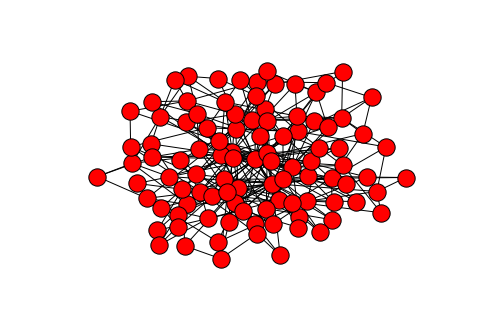

In [5]:
nx.draw(a)